<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will test sigmoid, tanh, and relu activation functions on the MNIST dataset.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion Function, and Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid, Tanh, and Relu</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

<h2>Preparation</h2>

In [4]:
# Using the following line code to install the torchvision library
!conda install -y torchvision -c pytorch

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\viann\Anaconda3

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-10.2.89        |       h74a9793_1       317.2 MB
    torchvision-0.6.0          |       py37_cu102         6.4 MB  pytorch
    ------------------------------------------------------------
                                           Total:       323.7 MB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/win-64::cudatoolkit-10.2.89-h74a9793_1
  torchvision        pytorch/win-64::torchvision-0.6.0-py37_cu102




cudatoolkit-10.2.89  | 317.2 MB  |            |   0% 
cudatoolkit-10.2.89  | 317.2 MB  |            |   0% 
cudatoolkit-10.2.89  | 317.2 MB  |            |   0% 
cudatoolkit-10.2.89  | 317.2 MB  |            |   1% 
cudatoolkit-10.2.89  | 317.

cudatoolkit-10.2.89  | 317.2 MB  | ###8       |  39% 
cudatoolkit-10.2.89  | 317.2 MB  | ###9       |  39% 
cudatoolkit-10.2.89  | 317.2 MB  | ###9       |  39% 
cudatoolkit-10.2.89  | 317.2 MB  | ###9       |  40% 
cudatoolkit-10.2.89  | 317.2 MB  | ###9       |  40% 
cudatoolkit-10.2.89  | 317.2 MB  | ####       |  40% 
cudatoolkit-10.2.89  | 317.2 MB  | ####       |  40% 
cudatoolkit-10.2.89  | 317.2 MB  | ####       |  41% 
cudatoolkit-10.2.89  | 317.2 MB  | ####       |  41% 
cudatoolkit-10.2.89  | 317.2 MB  | ####1      |  41% 
cudatoolkit-10.2.89  | 317.2 MB  | ####1      |  42% 
cudatoolkit-10.2.89  | 317.2 MB  | ####1      |  42% 
cudatoolkit-10.2.89  | 317.2 MB  | ####2      |  42% 
cudatoolkit-10.2.89  | 317.2 MB  | ####2      |  43% 
cudatoolkit-10.2.89  | 317.2 MB  | ####2      |  43% 
cudatoolkit-10.2.89  | 317.2 MB  | ####3      |  43% 
cudatoolkit-10.2.89  | 317.2 MB  | ####3      |  44% 
cudatoolkit-10.2.89  | 317.2 MB  | ####3      |  44% 
cudatoolkit-10.2.89  | 317.2

cudatoolkit-10.2.89  | 317.2 MB  | ########4  |  84% 
cudatoolkit-10.2.89  | 317.2 MB  | ########4  |  85% 
cudatoolkit-10.2.89  | 317.2 MB  | ########4  |  85% 
cudatoolkit-10.2.89  | 317.2 MB  | ########5  |  85% 
cudatoolkit-10.2.89  | 317.2 MB  | ########5  |  85% 
cudatoolkit-10.2.89  | 317.2 MB  | ########5  |  85% 
cudatoolkit-10.2.89  | 317.2 MB  | ########5  |  86% 
cudatoolkit-10.2.89  | 317.2 MB  | ########5  |  86% 
cudatoolkit-10.2.89  | 317.2 MB  | ########6  |  86% 
cudatoolkit-10.2.89  | 317.2 MB  | ########6  |  86% 
cudatoolkit-10.2.89  | 317.2 MB  | ########6  |  86% 
cudatoolkit-10.2.89  | 317.2 MB  | ########6  |  87% 
cudatoolkit-10.2.89  | 317.2 MB  | ########6  |  87% 
cudatoolkit-10.2.89  | 317.2 MB  | ########6  |  87% 
cudatoolkit-10.2.89  | 317.2 MB  | ########7  |  87% 
cudatoolkit-10.2.89  | 317.2 MB  | ########7  |  87% 
cudatoolkit-10.2.89  | 317.2 MB  | ########7  |  87% 
cudatoolkit-10.2.89  | 317.2 MB  | ########7  |  88% 
cudatoolkit-10.2.89  | 317.2

We'll need the following libraries

In [5]:
# Import the libraries we need for this lab



import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class using the sigmoid activation function: 

In [6]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x


Define the neural network module or class using the Tanh activation function:

In [7]:
# Build the model with Tanh function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
     
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  
        x = self.linear2(x)
        return x

Define the neural network module or class using the Relu activation function:

In [8]:
# Build the model with Relu function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss for each iteration  and accuracy on the validation data.

In [9]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [10]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw




Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [11]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [12]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object:

In [13]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer, and Train the Model</h2> 

Create the criterion function: 

In [14]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the model with 100 hidden neurons:  

In [15]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

<!--Empty Space for separating topics-->

<h2 id="Test">Test Sigmoid, Tanh, and Relu</h2> 

Train the network by using the sigmoid activations function:

In [16]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

Train the network by using the Tanh activations function:

In [17]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=10)

Train the network by using the Relu activations function:

In [18]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu,criterion, train_loader, validation_loader, optimizer, epochs=10)

<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Compare the training loss for each activation: 

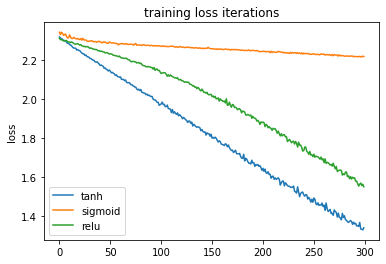

In [19]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Compare the validation loss for each model:  

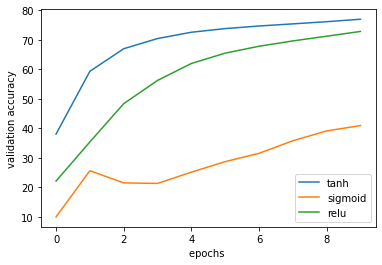

In [20]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

## what activation function performed best ?

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.